# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime 
from datetime import date 
import pprint as pp
# Import API key
from config import api_key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
query_url = f"{url}appid={api_key}&units={units}&q="
#print(query_url)
# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities=[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
       
    
#Print the city count to confirm sufficient count
len(cities)
#print(cities)
cities_df=pd.DataFrame(cities)
cities_df=cities_df.rename(columns={0:"City"})
cities_df["Cloudiness"]=""
cities_df["Country"]=""
cities_df["Date"]=""
cities_df["Humidity"]=""
cities_df["Lat"]=""
cities_df["Long"]=""
cities_df["Max Temp"]=""
cities_df["Wind Speed"]=""





#del cities_df[0]
cities_df.head()
#cities_df["cities"][0]

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,punta arenas,,,,,,,,
1,pontianak,,,,,,,,
2,taolanaro,,,,,,,,
3,ribeira grande,,,,,,,,
4,saskylakh,,,,,,,,


In [24]:

temp = []
str=query_url + cities_df["City"][0]
city1="vaitupu"
print(str)
response = requests.get(query_url + city1).json()
print(response)
#pp.pprint(response)

#print(response["name"])
#print(response["clouds"]["all"])
#print(response["sys"]["country"])
#print(response["dt"])
#print(response["main"]["humidity"])
#print(response["coord"]["lat"])
#print(response["coord"]["lon"])
#print(response["main"]["temp_max"])
#print(response["wind"]["speed"])
#print(response["main"]["pressure"])
ctycntr=1
setcnt =1
#print(response[""])
for index, row in cities_df.iterrows():
    city = row['City']
    
    if (ctycntr%50)==0:
        #print(ctycntr%50)
        ctycntr=1
        setcnt +=1
    else:
        ctycntr+=1 
    response = requests.get(query_url + city).json()
    print(f"Processing Record {ctycntr-1} of set {setcnt} | {city} ")
    print(query_url + city)
    if response["cod"]!="404" and response["cod"]!="500" :
        cities_df.loc[index, "Cloudiness"]=response["clouds"]["all"]
        #cities_df["Cloudiness"]=response["clouds"]["all"]
        cities_df.loc[index, "Country"]=response["sys"]["country"]
        #cities_df["Country"]=response["sys"]["country"]
        current_date=datetime.datetime.fromtimestamp(response["dt"]).strftime("%x")
        cities_df.loc[index, "Date"]=response["dt"]
        #cities_df["Date"]=response["dt"]
        cities_df.loc[index, "Humidity"]=response["main"]["humidity"]
        #cities_df["Humidity"]=response["main"]["humidity"]
        cities_df.loc[index, "Lat"]=float(response["coord"]["lat"])
        #cities_df["Lat"]=response["coord"]["lat"]
        cities_df.loc[index, "Long"]=response["coord"]["lon"]
        #cities_df["Long"]=response["coord"]["lon"]
        cities_df.loc[index, "Max Temp"]=float(response["main"]["temp_max"])
        #cities_df["Max Temp"]=response["main"]["temp_max"]
        cities_df.loc[index, "Wind Speed"]=response["wind"]["speed"]
        #cities_df["Wind Speed"]=response["wind"]["speed"]
    else:
        print("City Not Found")
        
#Processing Record 1 of Set 1 | lompoc

 #   lat.append(response['coord']['lat'])
 #   temp.append(response['main']['temp'])

#print(f"The latitude information received is: {lat}")
#print(f"The temperature information received is: {temp}")



http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=punta arenas
{'cod': '404', 'message': 'city not found'}
Processing Record 1 of set 1 | punta arenas 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=punta arenas
Processing Record 2 of set 1 | pontianak 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=pontianak
Processing Record 3 of set 1 | taolanaro 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=taolanaro
City Not Found
Processing Record 4 of set 1 | ribeira grande 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=ribeira grande
Processing Record 5 of set 1 | saskylakh 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=saskylakh
Processing Record 6 of set 1 | lud

Processing Record 4 of set 2 | coari 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=coari
Processing Record 5 of set 2 | bluff 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=bluff
Processing Record 6 of set 2 | te anau 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=te anau
Processing Record 7 of set 2 | tawau 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=tawau
Processing Record 8 of set 2 | cape town 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=cape town
Processing Record 9 of set 2 | cidreira 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=cidreira
Processing Record 10 of set 2 | airai 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9

Processing Record 8 of set 3 | mahebourg 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=mahebourg
Processing Record 9 of set 3 | saint george 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=saint george
Processing Record 10 of set 3 | isangel 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=isangel
Processing Record 11 of set 3 | sao joao da barra 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=sao joao da barra
Processing Record 12 of set 3 | kaitangata 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=kaitangata
Processing Record 13 of set 3 | aguimes 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=aguimes
Processing Record 14 of set 3 | tasiilaq 
http://a

Processing Record 13 of set 4 | tchibanga 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=tchibanga
Processing Record 14 of set 4 | sorvag 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=sorvag
City Not Found
Processing Record 15 of set 4 | pangody 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=pangody
Processing Record 16 of set 4 | bozeman 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=bozeman
Processing Record 17 of set 4 | victoria 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=victoria
Processing Record 18 of set 4 | gorele 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=gorele
Processing Record 19 of set 4 | butaritari 
http://api.openweathermap.o

Processing Record 20 of set 5 | sangar 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=sangar
Processing Record 21 of set 5 | bambous virieux 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=bambous virieux
Processing Record 22 of set 5 | linfen 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=linfen
Processing Record 23 of set 5 | trat 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=trat
Processing Record 24 of set 5 | pangnirtung 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=pangnirtung
Processing Record 25 of set 5 | rudbar 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=rudbar
City Not Found
Processing Record 26 of set 5 | tecoanapa 
http://api.openwea

Processing Record 23 of set 6 | aberdeen 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=aberdeen
Processing Record 24 of set 6 | xichang 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=xichang
Processing Record 25 of set 6 | mokhsogollokh 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=mokhsogollokh
Processing Record 26 of set 6 | san javier 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=san javier
Processing Record 27 of set 6 | rungata 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=rungata
City Not Found
Processing Record 28 of set 6 | xining 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=xining
Processing Record 29 of set 6 | yar-sale 
http://api.op

Processing Record 26 of set 7 | quilmana 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=quilmana
Processing Record 27 of set 7 | santiago de cuba 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=santiago de cuba
Processing Record 28 of set 7 | lewistown 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=lewistown
Processing Record 29 of set 7 | ayagoz 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=ayagoz
Processing Record 30 of set 7 | misratah 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=misratah
Processing Record 31 of set 7 | bud 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=bud
Processing Record 32 of set 7 | aden 
http://api.openweathermap.org/data

Processing Record 29 of set 8 | turkistan 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=turkistan
City Not Found
Processing Record 30 of set 8 | kichera 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=kichera
Processing Record 31 of set 8 | sibolga 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=sibolga
Processing Record 32 of set 8 | kogon 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=kogon
Processing Record 33 of set 8 | nyurba 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=nyurba
Processing Record 34 of set 8 | saqqez 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=saqqez
Processing Record 35 of set 8 | olga 
http://api.openweathermap.org/data/2.5/

Processing Record 33 of set 9 | ust-maya 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=ust-maya
Processing Record 34 of set 9 | ermelo 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=ermelo
Processing Record 35 of set 9 | kastrakion 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=kastrakion
Processing Record 36 of set 9 | turayf 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=turayf
Processing Record 37 of set 9 | korsakov 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=korsakov
Processing Record 38 of set 9 | rio verde de mato grosso 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=rio verde de mato grosso
Processing Record 39 of set 9 | wanning 
http://

Processing Record 36 of set 10 | resistencia 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=resistencia
Processing Record 37 of set 10 | barmer 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=barmer
Processing Record 38 of set 10 | waipawa 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=waipawa
Processing Record 39 of set 10 | hohhot 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=hohhot
Processing Record 40 of set 10 | el dovio 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=el dovio
Processing Record 41 of set 10 | talaya 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=talaya
Processing Record 42 of set 10 | oktyabrskiy 
http://api.openweathermap.org/da

Processing Record 40 of set 11 | mbandaka 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=mbandaka
Processing Record 41 of set 11 | cam ranh 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=cam ranh
Processing Record 42 of set 11 | awbari 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=awbari
Processing Record 43 of set 11 | bojonegoro 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=bojonegoro
Processing Record 44 of set 11 | saleaula 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=saleaula
City Not Found
Processing Record 45 of set 11 | elliot lake 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=elliot lake
Processing Record 46 of set 11 | cabo san lucas 


Processing Record 43 of set 12 | surt 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=surt
Processing Record 44 of set 12 | mount isa 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=mount isa
Processing Record 45 of set 12 | baracoa 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=baracoa
Processing Record 46 of set 12 | ponta delgada 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=ponta delgada
Processing Record 47 of set 12 | wisla 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=wisla
Processing Record 48 of set 12 | phek 
http://api.openweathermap.org/data/2.5/weather?appid=1d705ab9643efe2d53759ca1bb717a6f&units=imperial&q=phek
Processing Record 49 of set 12 | asyut 
http://api.openweathermap.org/data/2.5/wea

In [25]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,punta arenas,20,CL,1545235200,66,-53.16,-70.91,59,11.41
1,pontianak,80,ID,1545238127,96,-0.02,109.34,78.46,3.27
2,taolanaro,,,,,,,,
3,ribeira grande,20,PT,1545235200,77,38.52,-28.7,64.4,12.75
4,saskylakh,24,RU,1545237895,0,71.97,114.09,-38.91,4.79


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
cities_df.to_csv("cities")
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,punta arenas,20,CL,1545235200,66,-53.16,-70.91,59,11.41
1,pontianak,80,ID,1545238127,96,-0.02,109.34,78.46,3.27
2,taolanaro,,,,,,,,
3,ribeira grande,20,PT,1545235200,77,38.52,-28.7,64.4,12.75
4,saskylakh,24,RU,1545237895,0,71.97,114.09,-38.91,4.79


In [27]:
cities_df["Lat"]=pd.to_numeric(cities_df["Lat"])
cities_df["Max Temp"]=pd.to_numeric(cities_df["Max Temp"])
cities_df["Humidity"]=pd.to_numeric(cities_df["Humidity"])
cities_df["Wind Speed"]=pd.to_numeric(cities_df["Wind Speed"])
cities_df["Cloudiness"]=pd.to_numeric(cities_df["Cloudiness"])
ymax=cities_df["Max Temp"].max()+10
ymin=cities_df["Max Temp"].min()-10
xmax=cities_df["Lat"].max()+10
xmin=cities_df["Lat"].min()+10



#cities_df["Date"]=pd.to_float(cities_df["Date"])
#cities_df["Date"]=
#print(time.ctime(cities_df["Date"]))
#print(datetime.datetime.fromtimestamp(date.now()).strftime("%x"))
#print(datetime.datetime(cities_df["Date"].year, cities_df["Date"].month, cities_df["Date"].day))
#print(datetime.datetime.fromtimestamp((cities_df["Date"])))

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

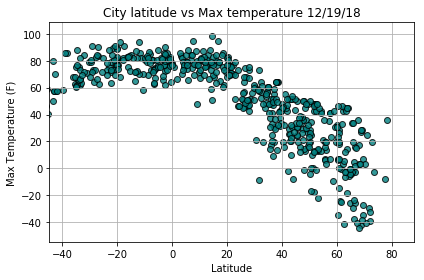

<Figure size 432x288 with 0 Axes>

In [28]:
#plt.figure(figsize=(8,8))
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.title(f"City latitude vs Max temperature {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
#cities_df["Max Temp"]=float(cities_df["Max Temp"])
#cities_df["Lat"]=float(cities_df["Lat"])
plt.scatter(cities_df["Lat"], cities_df["Max Temp"],marker="o", alpha=.8,linewidths=1, color="teal", edgecolors='black',label="Urban")
#plt.scatter(x_rur_axis, y_rur_fare_df,marker="o", alpha=.8,linewidths=1, color="yellow",s=10*rural_fr["driver_count"], edgecolors='black',label="Rural")
#plt.scatter(x_sub_axis, y_sub_df,marker="o", alpha=.8, linewidths=1,color="lightblue",s=10*sub_fr["driver_count"], edgecolors='black',label="Suburban")
#plt.axis('equal')
#s=10*urban_fr["driver_count"],
plt.grid()
plt.tight_layout()
plt.show()


plt.savefig("latitude_temp.png")

#### Latitude vs. Humidity Plot

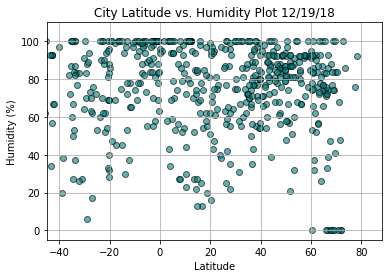

<Figure size 432x288 with 0 Axes>

In [29]:
#plt.figure(figsize=(10,8))
ymax=100+10
ymin=cities_df["Humidity"].min()-5
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.title(f"City Latitude vs. Humidity Plot {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
#cities_df["Max Temp"]=float(cities_df["Max Temp"])
#cities_df["Lat"]=float(cities_df["Lat"])
plt.scatter(cities_df["Lat"], cities_df["Humidity"],marker="o", alpha=.6,linewidths=1, color="teal", edgecolors='black',label="Urban")
#plt.scatter(x_rur_axis, y_rur_fare_df,marker="o", alpha=.8,linewidths=1, color="yellow",s=10*rural_fr["driver_count"], edgecolors='black',label="Rural")
#plt.scatter(x_sub_axis, y_sub_df,marker="o", alpha=.8, linewidths=1,color="lightblue",s=10*sub_fr["driver_count"], edgecolors='black',label="Suburban")
#plt.axis('equal')
#s=10*urban_fr["driver_count"],
plt.grid()
#plt.tight_layout()
plt.show()


plt.savefig("latitude_Humidty.png")

#### Latitude vs. Cloudiness Plot

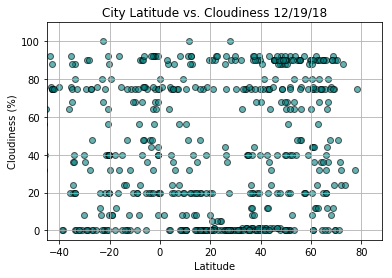

<Figure size 432x288 with 0 Axes>

In [30]:
#plt.figure(figsize=(10,8))
ymax=cities_df["Cloudiness"].max()+10
ymin=cities_df["Cloudiness"].min()-5
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.title(f"City Latitude vs. Cloudiness {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
#cities_df["Max Temp"]=float(cities_df["Max Temp"])
#cities_df["Lat"]=float(cities_df["Lat"])
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"],marker="o", alpha=.6,linewidths=1, color="teal", edgecolors='black',label="Urban")
#plt.scatter(x_rur_axis, y_rur_fare_df,marker="o", alpha=.8,linewidths=1, color="yellow",s=10*rural_fr["driver_count"], edgecolors='black',label="Rural")
#plt.scatter(x_sub_axis, y_sub_df,marker="o", alpha=.8, linewidths=1,color="lightblue",s=10*sub_fr["driver_count"], edgecolors='black',label="Suburban")
#plt.axis('equal')
#s=10*urban_fr["driver_count"],
plt.grid()
#plt.tight_layout()
plt.show()


plt.savefig("latitude_Cloudiness.png")

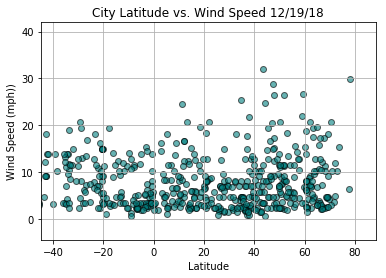

<Figure size 432x288 with 0 Axes>

In [31]:
#plt.figure(figsize=(10,8))
ymax=cities_df["Wind Speed"].max()+10
ymin=cities_df["Wind Speed"].min()-5
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.title(f"City Latitude vs. Wind Speed {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph))")
#cities_df["Max Temp"]=float(cities_df["Max Temp"])
#cities_df["Lat"]=float(cities_df["Lat"])
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"],marker="o", alpha=.6,linewidths=1, color="teal", edgecolors='black',label="Urban")
#plt.scatter(x_rur_axis, y_rur_fare_df,marker="o", alpha=.8,linewidths=1, color="yellow",s=10*rural_fr["driver_count"], edgecolors='black',label="Rural")
#plt.scatter(x_sub_axis, y_sub_df,marker="o", alpha=.8, linewidths=1,color="lightblue",s=10*sub_fr["driver_count"], edgecolors='black',label="Suburban")
#plt.axis('equal')
#s=10*urban_fr["driver_count"],
plt.grid()
#plt.tight_layout()
plt.show()


plt.savefig("latitude_Wind Speed.png")

#### Latitude vs. Wind Speed Plot